### Chapter 3.3 영화 평점 예측하기 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')

import time 
import operator 

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
movie_data = pd.io.parsers.read_csv('data/ml-1m/movies.dat', names = ['movie_id', 'title', 'genre' ], delimiter = '::')
rating_data = pd.io.parsers.read_csv('data/ml-1m/ratings.dat', names = ['user_id', 'movie_id', 'rating', 'time' ], delimiter = '::')
user_data = pd.io.parsers.read_csv('data/ml-1m/users.dat', names = ['user_id', 'gender', 'age', 'occupation', 'zipcode' ], delimiter = '::')

'''
movie_data = pd.read_csv('data/ml-1m/movies.dat', names = ['movie_id', 'title', 'genre' ], sep = '::')
rating_data = pd.read_csv('data/ml-1m/ratings.dat', names = ['user_id', 'movie_id', 'rating', 'time' ], sep = '::')
user_data = pd.read_csv('data/ml-1m/users.dat', names = ['user_id', 'gender', 'age', 'occupation', 'zipcode' ], sep = '::')
'''

"\nmovie_data = pd.read_csv('data/ml-1m/movies.dat', names = ['movie_id', 'title', 'genre' ], sep = '::')\nrating_data = pd.read_csv('data/ml-1m/ratings.dat', names = ['user_id', 'movie_id', 'rating', 'time' ], sep = '::')\nuser_data = pd.read_csv('data/ml-1m/users.dat', names = ['user_id', 'gender', 'age', 'occupation', 'zipcode' ], sep = '::')\n"

In [3]:
print(movie_data.shape)
movie_data.head()

(3883, 3)


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print(rating_data.shape)
rating_data.head()

(1000209, 4)


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
print(user_data.shape)
user_data.head()

(6040, 5)


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
## Q1. 전체 영화의 갯수는 몇개나 되는가? 
a = len(movie_data['movie_id'].unique())
print('Total Movies count : ', a)

Total Movies count :  3883


1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1929      3
1923      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64


<AxesSubplot:>

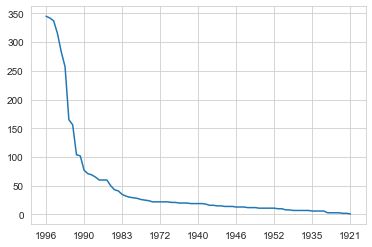

In [7]:
## Q2. 연도별 영화제작 건수는 어떠한가? 
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
m = movie_data['year'].value_counts()

print(m)
m.plot()

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


<AxesSubplot:>

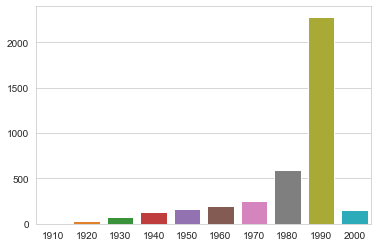

In [8]:
### 연대별 분포로 변환 
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
moview_year_term = movie_data['year_term'].value_counts().sort_index()
print(moview_year_term)

sns.barplot(x=moview_year_term.index, y=moview_year_term.values)

In [9]:
## Q3. 장르별 분포는 어떠한가? 
#### --> genre 컬럼을 구분자로 분리한 후, 각 장르의 갯수를 계산하여 unique_genre_dict에 저장한다. 
unique_genre_dict = {}

for index, row in movie_data.iterrows() : 
    genre_combination = row['genre']
    parsed_genre = genre_combination.split('|')
    
    for genre in parsed_genre : 
        if genre in unique_genre_dict : 
            unique_genre_dict[genre] += 1
        else : 
            unique_genre_dict[genre] = 1    
            

unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

<AxesSubplot:>

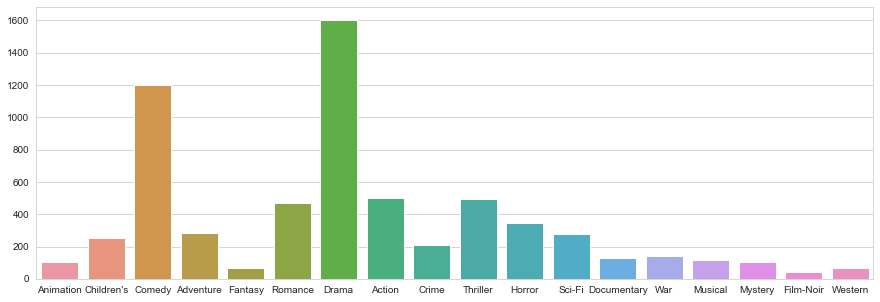

In [10]:
## unique_genre_dict의 key와 value를 x,y로 하여 차트를 그린다. 
plt.figure(figsize = (15, 5))
sns.barplot(list(unique_genre_dict.keys()), 
            list(unique_genre_dict.values())
           )

In [11]:
## Q4. 분석 대상 user의 수와, 성/연령 분포를 살펴보자 
s = len(user_data['user_id'].unique())
print('분석대상 User 인원 : ', s)

print('------------------------------------------')

user_gender = user_data['gender'].value_counts()
print('성별 user수 : ', user_gender, sep = '\n')

print('------------------------------------------')

user_age = user_data['age'].value_counts()
print('연령별 user수 : ', user_age, sep = '\n')

분석대상 User 인원 :  6040
------------------------------------------
성별 user수 : 
M    4331
F    1709
Name: gender, dtype: int64
------------------------------------------
연령별 user수 : 
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64


<AxesSubplot:>

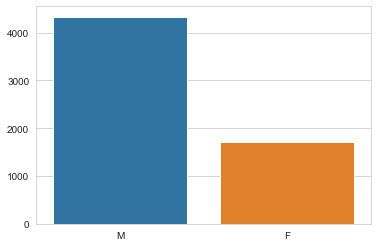

In [12]:
sns.barplot(x = user_gender.index, y = user_gender.values)

<AxesSubplot:>

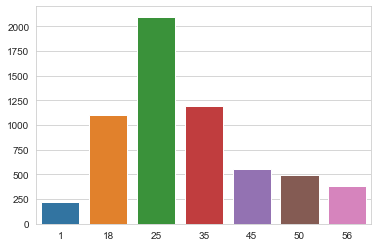

In [13]:
sns.barplot(x = user_age.index, y = user_age.values)

In [14]:
## Q5. 영화별 평가 갯수는? 
a = len(movie_data['movie_id'].unique())
print('Total numbers of Movies:', a)

movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
b = len(movie_rate_count)
print('Total numbers of Rated Movies :', b)

c = len(movie_rate_count[movie_rate_count < 100])
print('The numbers of Movies rated under #100 :', c)

Total numbers of Movies: 3883
Total numbers of Rated Movies : 3706
The numbers of Movies rated under #100 : 1687


<AxesSubplot:ylabel='Count'>

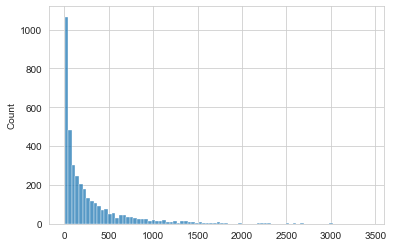

In [15]:
sns.histplot(x = movie_rate_count)

          rated_count  rating_mean
movie_id                          
1                2077     4.146846
2                 701     3.201141
3                 478     3.016736
4                 170     2.729412
5                 296     3.006757
...               ...          ...
3948              862     3.635731
3949              304     4.115132
3950               54     3.666667
3951               40     3.900000
3952              388     3.780928

[3706 rows x 2 columns]


<AxesSubplot:xlabel='rating_mean', ylabel='Count'>

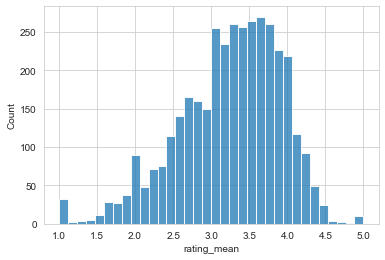

In [16]:
## Q6. 영화별 평균 평점은? 
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

print(movie_grouped_rating_info)
sns.histplot(x = movie_grouped_rating_info['rating_mean'])

In [17]:
#### 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 출력합니다.
merged_data = movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


In [18]:
#### user별 평가한 영화 갯수와 평가점수의 평균은? 
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean', 'std'])
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']

user_grouped_rating_info

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699
...,...,...,...
6036,888,3.302928,1.023684
6037,202,3.717822,0.877910
6038,20,3.800000,1.105013


In [19]:
print("<사용자별 평가 건수에 대한 통계량>")
print(user_grouped_rating_info['rated_count'].describe())
print('---------------------------------------------------')
print("<사용자별 평점 평균에 대한 통계량>")
print(user_grouped_rating_info['rating_mean'].describe())

<사용자별 평가 건수에 대한 통계량>
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: rated_count, dtype: float64
---------------------------------------------------
<사용자별 평점 평균에 대한 통계량>
count    6040.000000
mean        3.702705
std         0.429622
min         1.015385
25%         3.444444
50%         3.735294
75%         4.000000
max         4.962963
Name: rating_mean, dtype: float64


[Text(0.5, 1.0, 'Rating std by users')]

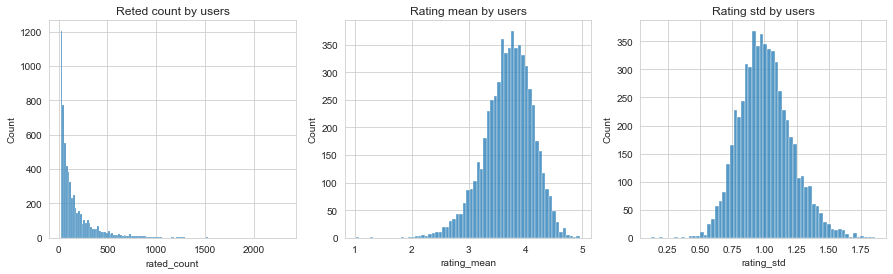

In [20]:
figure, ((ax1,ax2,ax3)) = plt.subplots(ncols=3)
figure.set_size_inches(15,4)

sns.histplot(x= user_grouped_rating_info['rated_count'], ax=ax1)
sns.histplot(x= user_grouped_rating_info['rating_mean'], ax=ax2)
sns.histplot(x= user_grouped_rating_info['rating_std'], ax=ax3)

ax1.set(title='Reted count by users')
ax2.set(title='Rating mean by users')
ax3.set(title='Rating std by users')

## 영화평점 예측하기 
- 평점이 매겨지지 않은 영화가 매우 많다. 따라서 특수한 통계적 데이터 보정이 필요하다. 
- 여기서는 SVD (Singular Value Decomposition) 모형을 사용한다. 
  https://angeloyeo.github.io/2019/08/01/SVD.html

In [21]:
#! pip install surprise 
# Anaconda prompt --> conda install -c conda-forge scikit-surprise 

In [22]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [23]:
## training data 

#### 1) 볌위 1~5의 object 생성 
reader = Reader(rating_scale = (1,5))

#### 2) rating_data => surprise lib dataset 
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

train_start = time.time()

#### 3) SVD model traing & fit 
model = SVD(n_factors = 8, 
            lr_all = 0.05, 
            reg_all = 0.02, 
            n_epochs = 100
            )

model.fit(train_data)

train_end = time.time()
print('Training Time = ', round(train_end - train_start, 2), 'sec')

Training Time =  74.89 sec


##### <font color = 'yellow'> # 특정 유저(user_id = k)에 대해 그가 아직 보지 않은 영화에 대한 평가점수를 예측하라 </font>

In [24]:
k = 4
target_user_data = rating_data[rating_data['user_id'] == k]
target_user_data.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [25]:
#### k가 기존에 평가했던 정보 추출 
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows() : 
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [33]:
## k가 아직 보지 않은 영화 정보 추출 
test_data = []

for index, row in movie_data.iterrows(): 
    movie_id = row['movie_id']
    rating = 0 
    if movie_id in target_user_movie_rating_dict : 
        continue 
    test_data.append((k, movie_id, rating))

    
print(len(test_data))
test_data[:5]

3862


[(4, 1, 0), (4, 2, 0), (4, 3, 0), (4, 4, 0), (4, 5, 0)]

In [36]:
## k의 평점 예측 
target_user_predictions = model.test(test_data)

print(len(target_user_predictions))
target_user_predictions[:5]

3862


[Prediction(uid=4, iid=1, r_ui=0, est=4.781515915156936, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.373382840249221, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.3464776895401087, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=1.9975367997227238, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=1.9491636237000711, details={'was_impossible': False})]

In [38]:
## 예측결과 저장 
def get_user_predicted_ratings(predictions, user_id, user_history) : 
    target_user_movie_predict_dict = {}
    
    for uid, mid, rating, predicted_rating, _ in predictions : 
        if user_id == uid : 
            if mid not in user_history : 
                target_user_movie_predict_dict[mid] = predicted_rating 
    return target_user_movie_predict_dict

In [51]:
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            user_id = k, 
                                                            user_history = target_user_movie_rating_dict)

## 저장된 dict로 부터 평점 Top 10 추출
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), 
                                     key= operator.itemgetter(1), 
                                     reverse = True)[:10]
target_user_top10_predicted

[(21, 5),
 (28, 5),
 (50, 5),
 (58, 5),
 (106, 5),
 (111, 5),
 (123, 5),
 (150, 5),
 (183, 5),
 (206, 5)]

In [52]:
## top10과 title 매칭 
movie_dict = {}

for index, row in movie_data.iterrows() : 
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title 
    
for predicted in target_user_top10_predicted : 
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ':', predicted_rating)

Get Shorty (1995) : 5
Persuasion (1995) : 5
Usual Suspects, The (1995) : 5
Postino, Il (The Postman) (1994) : 5
Nobody Loves Me (Keiner liebt mich) (1994) : 5
Taxi Driver (1976) : 5
Chungking Express (1994) : 5
Apollo 13 (1995) : 5
Mute Witness (1994) : 5
Unzipped (1995) : 5


##### <font color = 'yellow'> # Model Validation </font>

In [53]:
## RMSE(Root Mean Squre Error) 계산 
## SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다. 학습 데이터와 테스트 데이터를 8:2로 분할합니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력합니다.
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 66.87 seconds
RMSE of test dataset in SVD model:
RMSE: 0.8603


0.8602569003556679

In [54]:
## Hyper parameter tunning : n_factors를 변경하며 RMSE 변화를 관찰한다 
rmse_list_by_factors = []
ttime_list_by_factors = []

for n in range(1, 15):    
    train_start = time.time()
    model = SVD(n_factors=n,
                lr_all=0.005,
                reg_all=0.02,
                n_epochs=100)
    model.fit(train_data)
    train_end = time.time()
    print("training time of model: %.2f seconds" % (train_end - train_start))
    print("RMSE of test dataset in SVD model, n_factors=" + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print("------------------------------------")
print("searching n_factors is finish.")

training time of model: 52.76 seconds
RMSE of test dataset in SVD model, n_factors=1
RMSE: 0.8824
------------------------------------
training time of model: 56.14 seconds
RMSE of test dataset in SVD model, n_factors=2
RMSE: 0.8715
------------------------------------
training time of model: 56.69 seconds
RMSE of test dataset in SVD model, n_factors=3
RMSE: 0.8664
------------------------------------
training time of model: 58.34 seconds
RMSE of test dataset in SVD model, n_factors=4
RMSE: 0.8629
------------------------------------
training time of model: 60.63 seconds
RMSE of test dataset in SVD model, n_factors=5
RMSE: 0.8603
------------------------------------
training time of model: 61.40 seconds
RMSE of test dataset in SVD model, n_factors=6
RMSE: 0.8590
------------------------------------
training time of model: 64.65 seconds
RMSE of test dataset in SVD model, n_factors=7
RMSE: 0.8603
------------------------------------
training time of model: 66.08 seconds
RMSE of test data

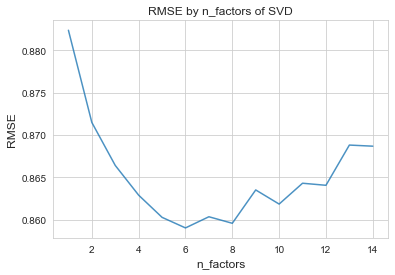

In [55]:
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

 ### Additional : 20대가 선호하는 영화는? 

In [61]:
## 20대 추출
user_data_under_30 = user_data[user_data['age'] < 30]
user_data_20 = user_data_under_30[user_data_under_30['age'] >= 20]

user_age_20_list = user_data_20['user_id'].tolist()

# 평가하지 않은 user-movie rating들에 대한 예측값을 계산합니다.
preprocess_start = time.time()
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

# 평가하지 않은 user-movie rating 중에서, 20대의 예측값을 선별합니다.
hidden_user_age_20_movie_predict_dict = {}
for uid, mid, _, predicted_rating, _ in predictions:
    if uid in user_age_20_list:
        if mid in hidden_user_age_20_movie_predict_dict:
            hidden_user_age_20_movie_predict_dict[mid]['sum'] += predicted_rating
            hidden_user_age_20_movie_predict_dict[mid]['count'] += 1
        else:
            hidden_user_age_20_movie_predict_dict[mid] = {}
            hidden_user_age_20_movie_predict_dict[mid]['sum'] = predicted_rating
            hidden_user_age_20_movie_predict_dict[mid]['count'] = 1

# 영화마다 20대 유저의 rating 평균값을 계산합니다.
for movie_id, score_dict in hidden_user_age_20_movie_predict_dict.items():
    score_dict['mean'] = score_dict['sum'] / score_dict['count']
    
# Top 10 movie_id를 추출합니다.
hidden_user_age_20_movie_list = sorted(hidden_user_age_20_movie_predict_dict, 
                                       key=lambda x: (hidden_user_age_20_movie_predict_dict[x]['mean']), 
                                       reverse=True)[:10]

preprocess_end = time.time()
print("preprocess time: %.2f seconds" % (preprocess_end - preprocess_start))

# 선정된 리스트를 출력합니다.
print("20대가 좋아할지도 모르는 영화 Top 10")
print("---------------------------------")
for movie_id in hidden_user_age_20_movie_list:
    movie_title = movie_dict[movie_id]
    age_20_rating = hidden_user_age_20_movie_predict_dict[movie_id]['mean']
    print("title:", movie_title, "| rating:", age_20_rating)

preprocess time: 689.25 seconds
20대가 좋아할지도 모르는 영화 Top 10
---------------------------------
title: Sanjuro (1962) | rating: 4.643406741976898
title: Shawshank Redemption, The (1994) | rating: 4.51253493085758
title: Apple, The (Sib) (1998) | rating: 4.497230465688192
title: Usual Suspects, The (1995) | rating: 4.4893304997073225
title: Aparajito (1956) | rating: 4.447994479818288
title: Harmonists, The (1997) | rating: 4.417740114041917
title: Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) | rating: 4.390433497110788
title: Mamma Roma (1962) | rating: 4.380555160277418
title: Schindler's List (1993) | rating: 4.376227916024946
title: Wrong Trousers, The (1993) | rating: 4.367924599145673
